In [6]:
import scipy
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import io

In [9]:
### Opens an IDL file in python using scipy ###
data = scipy.io.readsav("southern_sidelobe_decons/1061315448_source_array.sav",python_dict=True)

In [ ]:
# ==================================================================
# --------------Separating Point and Extended Sources---------------
# ==================================================================

#Finding length of data in *_source_array.sav to use as range in for loop
data_len = range(len(data['source_array']))

#Initializing lists for point and extended objects.
point_data_all = []
point_data_children = []
point_data_not_children = []
extended_data = []

#Separating data in *_source_array.sav between point and extended objects.
for i in data_len:
    if data['source_array'][i][-2] is None:
        point_data_all.append(data['source_array'][i])
    else:
        extended_data.append(data['source_array'][i])

In [ ]:
### Creating a 2D histogram of a single extended obj. ###

elem = 12
x = data['source_array']['extend'][elem]['RA']
y = data['source_array']['extend'][elem]['DEC']
plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('2-D Histogram of a Single Extended Source (Element 12)')
plt.show()
#plt.savefig('file_name')

In [18]:
### Create a function to open and plot one file ###

def filesav(filename):
    
    ### OPENING THE .SAV FILE IN PYTHON ###
    
    data = scipy.io.readsav(filename,python_dict=True) 
    
    data_len = range(len(data['source_array']))
    point_data = []
    extended_data = []

    for i in data_len:
        if data['source_array'][i][-2] is None:
            point_data.append(data['source_array'][i])
        else:
            extended_data.append(data['source_array'][i])
    
    print 'There are', len(data['source_array']), 'sources in this file.'
    print 'There are', len(extended_data), 'extended sources in this file.'
    print 'There are', len(point_data), 'point sources in this file.'
    
    #---------------------------------------------------------------------#
    
    ### DECLARING VARIABLES FOR PLOTS ###
    
    extended_RA = []
    extended_DEC = []
    extended_FREQ = []
    extended_I = []

    for i in range(len(extended_data)):
        extended_RA.append(extended_data[i]['RA'])
        extended_DEC.append(extended_data[i]['DEC'])
        extended_FREQ.append(extended_data[i]['FREQ'])
        extended_I.append(extended_data[i]['FLUX']['I'][0])

    point_RA = []
    point_DEC = []
    point_FREQ = []
    point_I = []

    for i in range(len(point_data)):
        point_RA.append(point_data[i]['RA'])
        point_DEC.append(point_data[i]['DEC'])
        point_FREQ.append(point_data[i]['FREQ'])
        point_I.append(point_data[i]['FLUX']['I'][0])

    intensity_all = []
    for i in range(len(data['source_array'])):
        intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
        arrays = []
        
    for i in data_len: 
        arrays.append(data['source_array'][i]['flux'][0][0])

    vmax = np.mean(arrays)
    
    #------------------------------------------------------------------#
    
    ### PLOTTING THE DATA ###

    plt.figure(figsize=(18, 15))

    plt.subplot(3,3,1)
    plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
    plt.title('Frequency (All Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,2)
    plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=intensity_all,vmax=vmax,s=10)
    plt.title('Intensity (All Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,3)
    plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=100)
    plt.title('Position (All Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,4)
    plt.scatter(point_RA,point_DEC,c=point_FREQ)
    plt.title('Frequency (All Point Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,5)
    plt.scatter(point_RA,point_DEC,c=point_I,vmax=vmax,s=10)
    plt.title('Intensity (All Point Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,6)
    plt.hist2d(point_RA,point_DEC,bins=100)
    plt.title('Position (All Point Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,7)
    plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
    plt.title('Frequency (Only Extended Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,8)
    plt.scatter(extended_RA,extended_DEC,c=extended_I,vmax=vmax,s=10)
    plt.title('Intensity (Only Extended Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,9)
    plt.hist2d(extended_RA,extended_DEC,bins=100)
    plt.title('Position (Only Extended Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()
    plt.show()

In [ ]:
# ==================================================================
# --------------Separating Point and Extended Sources---------------
# ==================================================================

#Finding length of data in *_source_array.sav to use as range in for loop
data_len = range(len(data['source_array']))

#Initializing lists for point and extended objects.
point_data = []
extended_data = []

#Separating data in *_source_array.sav between point and extended objects.
for i in data_len:
    if data['source_array'][i][-2] is None:
        point_data.append(data['source_array'][i])
    else:
        extended_data.append(data['source_array'][i])

extended_RA = []
extended_DEC = []
extended_FREQ = []
extended_I = []

for i in range(len(extended_data)):
    extended_RA.append(extended_data[i]['RA'])
    extended_DEC.append(extended_data[i]['DEC'])
    extended_FREQ.append(extended_data[i]['FREQ'])
    extended_I.append(extended_data[i]['FLUX']['I'][0])

point_RA = []
point_DEC = []
point_FREQ = []
point_I = []

for i in range(len(point_data)):
    point_RA.append(point_data[i]['RA'])
    point_DEC.append(point_data[i]['DEC'])
    point_FREQ.append(point_data[i]['FREQ'])
    point_I.append(point_data[i]['FLUX']['I'][0])
    
intensity_all = []
for i in range(len(data['source_array'])):
    intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
    
#-----------------------------------------------------------#
plt.figure(figsize=(18, 15))

plt.subplot(3,3,1)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
plt.title('Frequency (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,2)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=np.fft.ifft(intensity_all),vmax=.025)
plt.title('Inverse FT Intensity (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,3)
plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=100)
plt.title('Position (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,4)
plt.scatter(point_RA,point_DEC,c=point_FREQ)
plt.title('Frequency (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,5)
plt.scatter(point_RA,point_DEC,c=np.fft.ifft(point_I),vmax=.025)
plt.title('Inverse FT Intensity (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,6)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,7)
plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
plt.title('Frequency (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,8)
plt.scatter(extended_RA,extended_DEC,c=np.fft.ifft(extended_I),vmax=.025,s=10)
plt.title('Inverse FT Intensity (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,9)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()
#plt.show()
#plt.savefig('firstplot.png')

In [ ]:
arrays = []
for i in data_len: 
    arrays.append(data['source_array'][i]['flux'][0][0])

vmax = np.mean(arrays)

plt.figure(figsize=(18, 15))

plt.subplot(3,3,1)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
plt.title('Frequency (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,2)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=np.fft.ifft(intensity_all),vmax=vmax)
plt.title('Inverse FT Intensity (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,3)
plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=100)
plt.title('Position (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,4)
plt.scatter(point_RA,point_DEC,c=point_FREQ)
plt.title('Frequency (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,5)
plt.scatter(point_RA,point_DEC,c=np.fft.ifft(point_I),vmax=vmax)
plt.title('Inverse FT Intensity (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,6)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,7)
plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
plt.title('Frequency (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,8)
plt.scatter(extended_RA,extended_DEC,c=np.fft.ifft(extended_I),vmax=vmax,s=10)
plt.title('Inverse FT Intensity (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,9)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()
plt.show()

In [7]:
### Create a function to open lots of files at once ###

def foldersav():
    
    all_files = glob.glob('southern_sidelobe_decons*.sav')
    
    for o in range(len(all_files)):
        
        filename = all_files[o] ### <--- for speed, should be o 
        
        print filename
    
        ### OPENING THE .SAV FILE IN PYTHON ###

        data = scipy.io.readsav(filename,python_dict=True) 

        data_len = range(len(data['source_array']))
        point_data = []
        extended_data = []

        for i in data_len:
            if data['source_array'][i][-2] is None:
                point_data.append(data['source_array'][i])
            else:
                extended_data.append(data['source_array'][i])

        print 'There are', len(data['source_array']), 'sources in this file.'
        print 'There are', len(extended_data), 'extended sources in this file.'
        print 'There are', len(point_data), 'point sources in this file.'

        #---------------------------------------------------------------------#

        ### DECLARING VARIABLES FOR PLOTS ###

        extended_RA = []
        extended_DEC = []
        extended_FREQ = []
        extended_I = []

        for i in range(len(extended_data)):
            extended_RA.append(extended_data[i]['RA'])
            extended_DEC.append(extended_data[i]['DEC'])
            extended_FREQ.append(extended_data[i]['FREQ'])
            extended_I.append(extended_data[i]['FLUX']['I'][0])

        point_RA = []
        point_DEC = []
        point_FREQ = []
        point_I = []

        for i in range(len(point_data)):
            point_RA.append(point_data[i]['RA'])
            point_DEC.append(point_data[i]['DEC'])
            point_FREQ.append(point_data[i]['FREQ'])
            point_I.append(point_data[i]['FLUX']['I'][0])

        intensity_all = []
        for i in range(len(data['source_array'])):
            intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
            arrays = []

        for i in data_len: 
            arrays.append(data['source_array'][i]['flux'][0][0])

        vmax = np.mean(arrays)

        #------------------------------------------------------------------#

        ### PLOTTING THE DATA ###

        plt.figure(figsize=(18, 15))

        plt.subplot(3,3,1)
        plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
        plt.title('Frequency (All Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,2)
        plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=intensity_all,vmax=vmax,s=10)
        plt.title('Intensity (All Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,3)
        plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=60)
        plt.title('Position (All Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,4)
        plt.scatter(point_RA,point_DEC,c=point_FREQ)
        plt.title('Frequency (All Point Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,5)
        plt.scatter(point_RA,point_DEC,c=point_I,vmax=vmax,s=10)
        plt.title('Intensity (All Point Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,6)
        plt.hist2d(point_RA,point_DEC,bins=60)
        plt.title('Position (All Point Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,7)
        plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
        plt.title('Frequency (Only Extended Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,8)
        plt.scatter(extended_RA,extended_DEC,c=extended_I,vmax=vmax,s=10)
        plt.title('Intensity (Only Extended Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,9)
        plt.hist2d(extended_RA,extended_DEC,bins=60)
        plt.title('Position (Only Extended Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()
        plt.show()
        

There are 5181 sources in this file.
There are 3289 extended sources in this file.
There are 1892 point sources in this file.


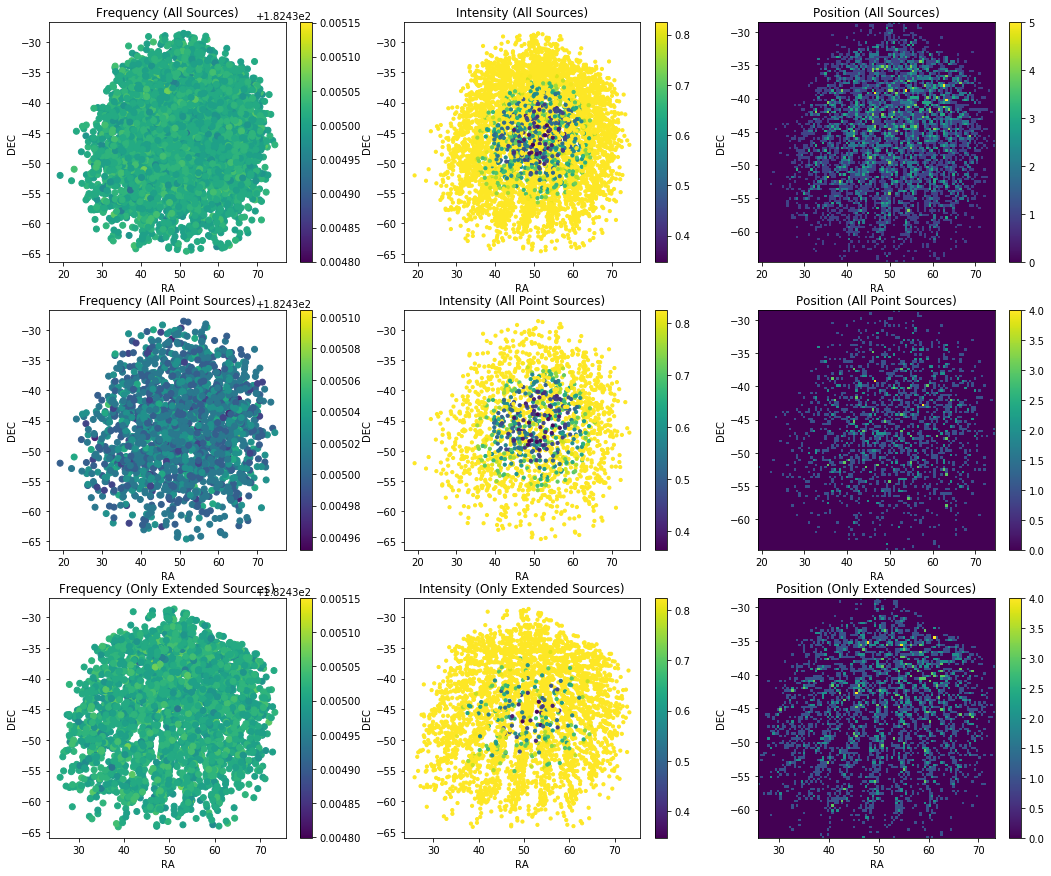

In [24]:
'''
all_files = glob.glob('foldername/*.sav')
for o in range(len(all_files)):
        
     filename = all_files[o]
    
     ### OPENING THE .SAV FILE IN PYTHON ###

     data = scipy.io.readsav(filename,python_dict=True) 
     '''
filesav('diffuse_survey_source_arrays/1130781304_source_array.sav')

In [23]:


for o in 
    data['source_array']['extend'][0]['flux']

array([ rec.array([( 0.04676148,  0.03734475,  0.+0.j,  0.+0.j,  1.90996587,  0.,  0.,  0.)], 
          dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')]),
       rec.array([( 0.04250947,  0.03394901,  0.+0.j,  0.+0.j,  1.7362932,  0.,  0.,  0.)], 
          dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')]),
       rec.array([( 0.03863464,  0.03085447,  0.+0.j,  0.+0.j,  1.57802606,  0.,  0.,  0.)], 
          dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')]),
       rec.array([( 0.03522883,  0.02813453,  0.+0.j,  0.+0.j,  1.43891668,  0.,  0.,  0.)], 
          dtype=[(('xx', 'XX'), '>f4'),

In [20]:
foldersav()